In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Category
count,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,...,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000,10584.000000
mean,5291.500000,2749.555178,156.166572,16.501417,227.769369,51.074074,1705.924320,213.064531,218.928855,134.636999,...,0.045729,0.041289,0.001512,0.006236,0.000756,0.001701,0.050359,0.042423,0.029101,3.996693
std,3055.481959,416.342810,109.962125,8.430057,210.810597,61.023275,1319.857002,30.255876,22.846098,45.734014,...,0.208908,0.198967,0.038853,0.078724,0.027484,0.041206,0.218695,0.201561,0.168096,1.998225
min,0.000000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,58.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2645.750000,2378.000000,64.000000,10.000000,67.000000,5.000000,757.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5291.500000,2753.000000,126.000000,15.000000,180.000000,33.000000,1307.000000,220.000000,222.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,7937.250000,3103.000000,258.000000,22.000000,324.000000,79.000000,2258.000000,235.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,10583.000000,3849.000000,360.000000,50.000000,1318.000000,554.000000,6836.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.skew()

Id                                      0.000000
Elevation                               0.067813
Aspect                                  0.463392
Slope                                   0.518950
Horizontal_Distance_To_Hydrology        1.504667
Vertical_Distance_To_Hydrology          1.541065
Horizontal_Distance_To_Roadways         1.258889
Hillshade_9am                          -1.089154
Hillshade_Noon                         -0.959625
Hillshade_3pm                          -0.337372
Horizontal_Distance_To_Fire_Points      1.634887
Wilderness_Area1                        1.222083
Wilderness_Area2                        5.190428
Wilderness_Area3                        0.331412
Wilderness_Area4                        0.827030
Soil_Type1                              6.457008
Soil_Type2                              4.642054
Soil_Type3                              3.567722
Soil_Type4                              3.941173
Soil_Type5                              9.354011
Soil_Type6          

In [4]:
df.groupby('Category').size()

Category
1    1514
2    1516
3    1501
4    1518
5    1538
6    1489
7    1508
dtype: int64

In [6]:
df.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Category
Id,1.000000,-0.005227,-0.004394,-0.008953,-0.011370,-0.007685,-0.006392,0.009595,0.007181,-0.003860,...,-0.007922,-0.000618,0.002281,0.011857,-0.007309,0.005136,-0.017979,0.004071,-0.005000,-0.007263
Elevation,-0.005227,1.000000,-0.000267,-0.315746,0.413621,0.121484,0.571724,0.094339,0.222791,0.098165,...,0.172601,0.120694,0.019411,0.115684,0.044225,0.064100,0.332576,0.294228,0.297368,0.015093
Aspect,-0.004394,-0.000267,1.000000,0.020944,0.045077,0.055789,0.072138,-0.589494,0.325801,0.630792,...,0.003329,0.014249,0.008788,-0.007062,0.004179,-0.038580,0.040063,-0.032345,0.021285,0.008155
Slope,-0.008953,-0.315746,0.020944,1.000000,-0.054552,0.270430,-0.278949,-0.188249,-0.612815,-0.338113,...,-0.149411,0.063314,-0.027702,-0.048423,-0.005306,0.003529,-0.151723,0.056492,-0.039304,0.084823
Horizontal_Distance_To_Hydrology,-0.011370,0.413621,0.045077,-0.054552,1.000000,0.649203,0.196226,-0.035908,0.076806,0.080858,...,0.138202,0.069764,0.080325,-0.010578,0.087918,-0.011703,0.140099,0.069632,0.240171,-0.008441
Vertical_Distance_To_Hydrology,-0.007685,0.121484,0.055789,0.270430,0.649203,1.000000,0.008223,-0.098655,-0.138205,-0.037085,...,0.020673,0.082942,0.038093,-0.017621,0.016812,-0.022371,-0.006397,0.069169,0.218447,0.073519
Horizontal_Distance_To_Roadways,-0.006392,0.571724,0.072138,-0.278949,0.196226,0.008223,1.000000,-0.010704,0.244275,0.182621,...,0.033571,0.039892,0.018871,0.065179,0.033680,0.055705,0.191808,0.117881,0.142473,-0.108886
Hillshade_9am,0.009595,0.094339,-0.589494,-0.188249,-0.035908,-0.098655,-0.010704,1.000000,-0.015879,-0.778588,...,0.018444,-0.054219,0.006508,0.031052,0.013691,0.012721,0.012790,0.026372,-0.020119,-0.010279
Hillshade_Noon,0.007181,0.222791,0.325801,-0.612815,0.076806,-0.138205,0.244275,-0.015879,1.000000,0.617849,...,0.091753,-0.014383,0.035357,0.032295,0.032441,-0.029180,0.107268,-0.054091,-0.009106,-0.086950
Hillshade_3pm,-0.003860,0.098165,0.630792,-0.338113,0.080858,-0.037085,0.182621,-0.778588,0.617849,1.000000,...,0.056815,0.028615,0.017060,-0.000342,0.006533,-0.025595,0.071002,-0.056624,0.021114,-0.047231


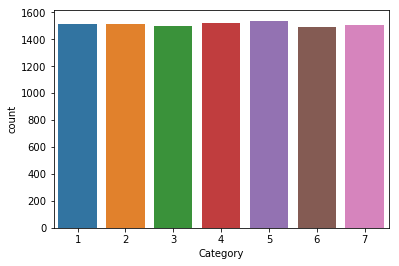

In [7]:
sns.countplot(df['Category'],label="Count")# Simple plot of the distribution of various categories of forest cover, which is the target attributeplt.show()

In [8]:
df.isna().sum() #Check for missing values

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [9]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Category
0,0,2934,276,10,0,0,1825,194,242,187,...,0,0,0,0,0,0,0,0,0,5
1,1,3496,265,12,351,49,1430,190,245,194,...,0,0,0,0,0,0,0,0,1,7
2,2,2493,101,14,30,0,1065,243,220,103,...,0,0,0,0,0,0,0,0,0,3
3,3,3502,150,13,330,95,3918,236,239,131,...,0,0,0,0,0,0,0,0,1,7
4,4,3076,34,10,134,-6,2218,219,218,134,...,0,0,0,0,0,0,0,0,0,1


In [10]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [11]:
rem = []
#Add constant columns as they don't help in prediction process
for c in df.columns:
    if df[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
df.drop(rem,axis=1,inplace=True)

print(rem)

#Following columns are dropped

['Soil_Type7', 'Soil_Type15']


In [12]:
X=df.drop(['Category'],axis=1)  #Seperating the label as y and the rest of attributes in X
y=df['Category']
X.iloc[0].shape

(53,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

C:\Users\Chinnu\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [14]:
clf_accuracy=[]

In [17]:
lg=LogisticRegression(max_iter=1000)
lg.fit(X_train,y_train)
pred=lg.predict(X_test)
clf_accuracy.append(accuracy_score(y_test,pred))
print(accuracy_score(y_test,pred))

C:\Users\Chinnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chinnu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6783183750590458


0.5923476617855455


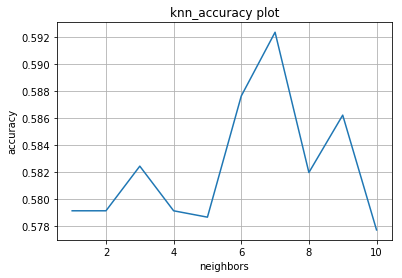

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()


l=[i for i in range(1,11)]
accuracy=[]

for i in l:
    model=KNeighborsClassifier(n_neighbors=i,weights='distance')
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred))
    
plt.plot(l,accuracy)
plt.title('knn_accuracy plot')
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.grid()

print(max(accuracy))

clf_accuracy.append(max(accuracy))

In [19]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(X_train,y_train)
pred=(model.predict(X_test))
clf_accuracy.append(accuracy_score(y_test,pred))
print(accuracy_score(y_test,pred))

C:\Users\Chinnu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.12942843646669816


In [20]:
rand=RandomForestClassifier()
rand.fit(X_train,y_train)
pred=rand.predict(X_test)
clf_accuracy.append(accuracy_score(y_test,pred))
print(accuracy_score(y_test,pred))

C:\Users\Chinnu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8162494095418045


In [23]:
xgb=XGBClassifier(max_depth=7)
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
clf_accuracy.append(accuracy_score(y_test,pred))
print(accuracy_score(y_test,pred))

0.8663202645252717


In [24]:
nb=GaussianNB()
nb.fit(X_train,y_train)
pred=nb.predict(X_test)
clf_accuracy.append(accuracy_score(y_test,pred))
print(accuracy_score(y_test,pred))

0.6461974492205952


In [25]:
classifier_list=['log_regression','knn','svm','rforest','xgboost','nbayes']

Text(0.5, 1.0, 'classifier vs accuracy plot')

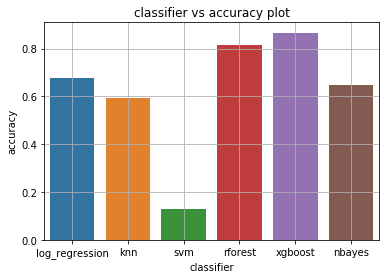

In [36]:
sns.barplot(x=classifier_list,y=clf_accuracy)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('classifier')
plt.title('classifier vs accuracy plot')

In [29]:
model = keras.Sequential([
keras.layers.Dense(512,input_shape=(53,)),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(8, activation="softmax")
])


In [30]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [32]:
history=model.fit(X_train,y_train, epochs=75,validation_data=(X_test, y_test))


Train on 8467 samples, validate on 2117 samples
Epoch 1/75
8467/8467 [==============================] - 12s 1ms/step - loss: 3.9140 - accuracy: 0.2354 - val_loss: 1.6786 - val_accuracy: 0.2735
Epoch 2/75
8467/8467 [==============================] - 9s 1ms/step - loss: 1.6665 - accuracy: 0.2931 - val_loss: 1.6777 - val_accuracy: 0.3004
Epoch 3/75
8467/8467 [==============================] - 9s 1ms/step - loss: 1.5424 - accuracy: 0.3418 - val_loss: 1.4530 - val_accuracy: 0.3642
Epoch 4/75
8467/8467 [==============================] - 8s 997us/step - loss: 1.3572 - accuracy: 0.4176 - val_loss: 1.3788 - val_accuracy: 0.4350
Epoch 5/75
8467/8467 [==============================] - 10s 1ms/step - loss: 1.2532 - accuracy: 0.4570 - val_loss: 1.2625 - val_accuracy: 0.4398
Epoch 6/75
8467/8467 [==============================] - 11s 1ms/step - loss: 1.1785 - accuracy: 0.4827 - val_loss: 1.1597 - val_accuracy: 0.4842
Epoch 7/75
8467/8467 [==============================] - 11s 1ms/step - loss: 1.110

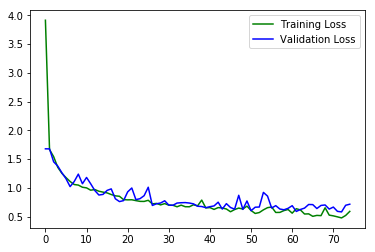

In [33]:
plt.figure(0)
plt.plot(history.history['loss'],'g',label='Training Loss')
plt.plot(history.history['val_loss'],'b',label='Validation Loss')
plt.legend()
plt.show()

In [35]:
model.save('model.h5')